# INSTALLATION OF NECESSARY LIBRARIES

In [1]:
pip install segment-anything

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install supervision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pycocotools

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/85.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.3 kB ? eta -:--:--
   ---------------------------------------- 85.3/85.3 kB 1.2 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/41.3 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.3 kB ? eta -:--:--
     -------------------------------------- 41.3/41.3 kB 492.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/869.4 kB ? eta -:--:--
   -------- ------------------------------- 174.1/869.4 kB 3.5 MB/s eta 0:00:01
   ---------------- ----------------------- 368.6/869.4 kB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 614.4/869.4 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------  860.2/869.4 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 869.4/869.4 kB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   -

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# SEGMENT ANYTHING ANNOTATED IMAGES

In [ ]:
import torch
import os
from segment_anything import sam_model_registry
import cv2
from segment_anything import SamAutomaticMaskGenerator
import supervision as sv


DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = r"C:\Users\Computing\Desktop\Project\PROJECT\sam_vit_h_4b8939-002.pth"


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)


mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)


INPUT_FOLDER = r"C:\Users\Computing\Desktop\project\PROJECT\tomatoes_subset_cam0\images"
OUTPUT_FOLDER = r"C:\Users\Computing\Desktop\project\PROJECT\annotated_images"


os.makedirs(OUTPUT_FOLDER, exist_ok=True)


for filename in os.listdir(INPUT_FOLDER):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(INPUT_FOLDER, filename)
       
        
        image_bgr = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
       
       
        sam_result = mask_generator.generate(image_rgb)
       
        
        detections = sv.Detections.from_sam(sam_result=sam_result)
       
        
        annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)
       
        output_path = os.path.join(OUTPUT_FOLDER, filename)
        cv2.imwrite(output_path, annotated_image)

        print(f"Processed and saved {filename} to {OUTPUT_FOLDER}")

# VISUALIZATION OF SOME OF THE ANNOTATED IMAGES

In [ ]:
import matplotlib.pyplot as plt
def display_annotated_images(output_folder, num_images=5):
    
    image_files = [f for f in os.listdir(output_folder) if f.endswith(".jpg") or f.endswith(".png")]
    
    
    image_files = image_files[:num_images]
    
   
    for image_file in image_files:
        image_path = os.path.join(output_folder, image_file)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.title(image_file)
        plt.axis('off')
        plt.show()
display_annotated_images(OUTPUT_FOLDER)

# GENERATION OF SEGMENTATION MASKS

In [ ]:
import torch
import os
import cv2
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator


DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"


sam = sam_model_registry[MODEL_TYPE](checkpoint=r"C:\Users\Computing\Desktop\project\PROJECT\sam_vit_h_4b8939-001.pth")
sam.to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)


INPUT_DIR = r"C:\Users\Computing\Desktop\project\PROJECT\tomatoes_subset_cam0\images"
OUTPUT_DIR = r"C:\Users\Computing\Desktop\project\PROJECT\masks"
os.makedirs(OUTPUT_DIR, exist_ok=True)


for filename in os.listdir(INPUT_DIR):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(INPUT_DIR, filename)
        image_bgr = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        
        sam_result = mask_generator.generate(image_rgb)

        # Extract masks and save them
        masks = [
            mask['segmentation']
            for mask
            in sorted(sam_result, key=lambda x: x['area'], reverse=True)
        ]

        
        for i, mask in enumerate(masks):
            mask_filename = os.path.join(OUTPUT_DIR, f"{os.path.splitext(filename)[0]}_mask_{i}.png")
            
            cv2.imwrite(mask_filename, mask.astype('uint8') * 255)  

print("Mask generation and saving completed.")

# VISUALIZATION OF SOME OF THE SEGMENTATION MASKS

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

def visualize_masks(mask_paths):
    fig, axes = plt.subplots(1, len(mask_paths), figsize=(15, 5))
    for i, mask_path in enumerate(mask_paths):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(mask, cmap='gray')
        # axes[i].set_title(f'Mask {i}')
        axes[i].axis('off')
    plt.show()

# Define output directory
output_dir = r"C:\Users\Computing\Desktop\Project\PROJECT\generated_r_masks"

# Get list of all mask file paths in the directory
mask_paths = [os.path.join(output_dir, file) for file in os.listdir(output_dir) if file.endswith('.png')]

num_masks_to_visualize = 10

selected_masks = mask_paths[:num_masks_to_visualize]

# Visualize the selected masks
visualize_masks(selected_masks)

# CONVERSION OF MASKS TO COCO JSON FORMAT

In [30]:
import os
import json
import cv2
import numpy as np
from PIL import Image
from pycocotools import mask as maskUtils
from skimage.measure import label


def create_annotations_from_mask(mask_image, image_id, category_id, annotation_id_start):
    mask = np.array(mask_image, dtype=np.uint8)
    labels = label(mask)  # Label connected components
    annotations = []
    annotation_id = annotation_id_start
    
    for region_label in np.unique(labels):
        if region_label == 0:
            continue  # Skip the background
        
        
        region_mask = (labels == region_label).astype(np.uint8)
        
        
        encoded_mask = maskUtils.encode(np.asfortranarray(region_mask))
        
        
        area = maskUtils.area(encoded_mask)
        bbox = maskUtils.toBbox(encoded_mask)
        
        
        encoded_mask['counts'] = encoded_mask['counts'].decode('utf-8')  # decode bytes to str
        
        annotation = {
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "segmentation": encoded_mask,
            "area": float(area),
            "bbox": bbox.tolist(),
            "iscrowd": 0
        }
        
        annotations.append(annotation)
        annotation_id += 1
    
    return annotations, annotation_id


def process_and_generate_coco_json(images_folder, masks_folder_tomato, masks_folder_stalk, output_json_path):
  
    coco_format = {
        "images": [],
        "annotations": [],
        "categories": [
            {"id": 1, "name": "tomato"},
            {"id": 2, "name": "stalk"}
        ]
    }

    annotation_id = 1

   
    for img_id, img_filename in enumerate(sorted(os.listdir(images_folder))):
        img_path = os.path.join(images_folder, img_filename)
        img = Image.open(img_path)
        img_width, img_height = img.size

        
        coco_format["images"].append({
            "id": img_id + 1,
            "file_name": img_filename,
            "height": img_height,
            "width": img_width
        })

       
        for mask_filename in os.listdir(masks_folder_tomato):
            if mask_filename.startswith(img_filename.replace(".jpg", "")) and '_tomato' in mask_filename:
                mask_path = os.path.join(masks_folder_tomato, mask_filename)
                tomato_mask = Image.open(mask_path).convert("L")
                tomato_annotations, annotation_id = create_annotations_from_mask(tomato_mask, img_id + 1, 1, annotation_id)
                coco_format["annotations"].extend(tomato_annotations)

        
        for mask_filename in os.listdir(masks_folder_stalk):
            if mask_filename.startswith(img_filename.replace(".jpg", "")) and '_stalk' in mask_filename:
                mask_path = os.path.join(masks_folder_stalk, mask_filename)
                stalk_mask = Image.open(mask_path).convert("L")
                stalk_annotations, annotation_id = create_annotations_from_mask(stalk_mask, img_id + 1, 2, annotation_id)
                coco_format["annotations"].extend(stalk_annotations)

    
    with open(output_json_path, "w") as json_file:
        json.dump(coco_format, json_file, indent=4)

    print("Conversion completed and saved to", output_json_path)


train_images_folder = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\train images"
train_masks_folder_tomato = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\train masks\tomato_train_masks"
train_masks_folder_stalk = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\train masks\stalk_train_masks"

val_images_folder = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\val images"
val_masks_folder_tomato = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\val masks\tomato_val_masks"
val_masks_folder_stalk = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\val masks\stalk_val_masks"

test_image_folder = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\test images"
test_tomato_mask_folder = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\test masks\tomato_test_masks"
test_stalk_mask_folder = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\test masks\stalk_test_masks"



train_output_json = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\train_annotations_rl.json"
val_output_json = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\val_annotations_rl.json"
test_output_json = r"C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\test_annotations_rl.json"


process_and_generate_coco_json(train_images_folder, train_masks_folder_tomato, train_masks_folder_stalk, train_output_json)


process_and_generate_coco_json(val_images_folder, val_masks_folder_tomato, val_masks_folder_stalk, val_output_json)


process_and_generate_coco_json(test_image_folder, test_tomato_mask_folder, test_stalk_mask_folder, test_output_json)


Conversion completed and saved to C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\train_annotations_rl.json
Conversion completed and saved to C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\val_annotations_rl.json
Conversion completed and saved to C:\Users\olaol\OneDrive\Desktop\Tomato--dataset-n\test_annotations_rl.json


# MODEL TRAINING

# MASK RCNN USING RESNET 101 AS BACKBONE NETWORK

In [2]:


import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection import MaskRCNN
from torchvision.models import resnet101
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from pycocotools.coco import COCO
from PIL import Image
from torchvision.transforms import ToTensor
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


class TomatoDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.coco = COCO(annotations_file)
        self.img_ids = list(self.coco.imgs.keys())
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img_info = self.coco.loadImgs(img_id)[0]
        img_path = f"{self.img_dir}/{img_info['file_name']}"
        image = Image.open(img_path).convert("RGB")

        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        annotations = self.coco.loadAnns(ann_ids)
        boxes = []
        masks = []
        labels = []

        for ann in annotations:
            mask = self.coco.annToMask(ann)
            if mask.sum() == 0:
                continue  # Skip empty masks
            masks.append(mask)
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x + w, y + h])
            labels.append(ann['category_id'])

       
        if len(masks) == 0:
            return None

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.stack([torch.as_tensor(mask, dtype=torch.uint8) for mask in masks], dim=0)

        target = {'boxes': boxes, 'labels': labels, 'masks': masks, 'image_id': torch.tensor([img_id])}

        
        if self.transform:
            image = self.transform(image)
        
        return image, target

        

def get_model(num_classes):
    
    backbone = resnet_fpn_backbone('resnet101', pretrained=True)
    
    
    model = MaskRCNN(backbone, num_classes=num_classes)

    
    in_features_box = model.roi_heads.box_predictor.cls_score.in_features
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels

    
    dim_reduced = model.roi_heads.mask_predictor.conv5_mask.out_channels

   
    model.roi_heads.box_predictor = FastRCNNPredictor(in_channels=in_features_box, num_classes=num_classes)

   
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_channels=in_features_mask, dim_reduced=dim_reduced, num_classes=num_classes)

    return model

# Define training function
def train(model, data_loader, optimizer, device):
    model.train()
    for images, targets in data_loader:
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

# Define evaluation function
def evaluate(model, data_loader, device):
    model.eval()
    with torch.no_grad():
        for images, targets in data_loader:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
            outputs = model(images)
            
            print(outputs)


def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    if len(batch) == 0:
        return [], [] 
    return tuple(zip(*batch))


train_annotations_file = r"C:\Users\Computing\Desktop\tomato general\train_annotations_rl.json"
train_img_dir = r"C:\Users\Computing\Desktop\tomato general\train images"

val_annotations_file = r"C:\Users\Computing\Desktop\tomato general\val_annotations_rl.json"
val_img_dir = r"C:\Users\Computing\Desktop\tomato general\val images"


train_dataset = TomatoDataset(annotations_file=train_annotations_file, img_dir=train_img_dir, transform=ToTensor())
val_dataset = TomatoDataset(annotations_file=val_annotations_file, img_dir=val_img_dir, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)


num_classes = 3  # Number of classes (Tomato, Stalk) + background
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = get_model(num_classes)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)


num_epochs = 10  
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train(model, train_loader, optimizer, device)
    print("Evaluating on validation set:")
    evaluate(model, val_loader, device)


torch.save(model.state_dict(), 'maskrcnn_tomato_stalk_rl.pth')
print('model training and saving complete')


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# INFERENCE ON TEST IMAGES

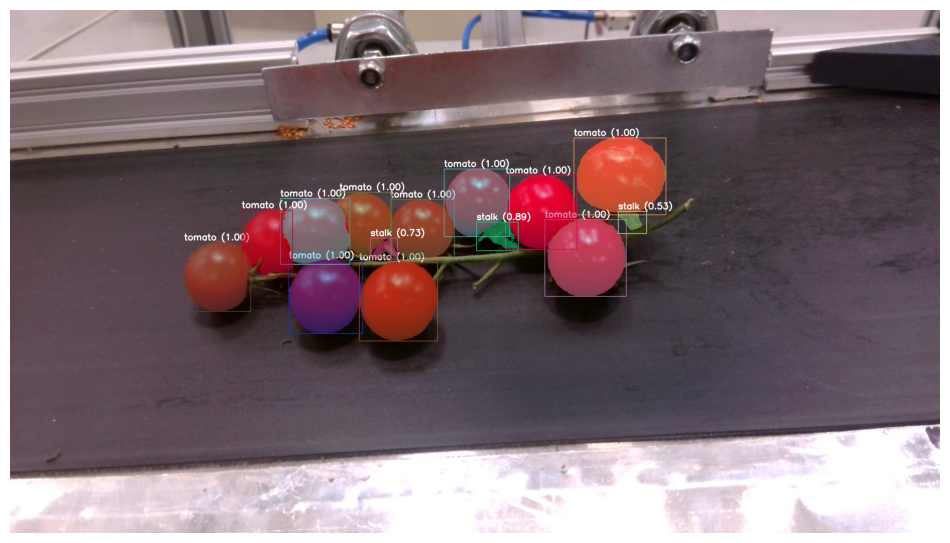

In [5]:
import torch
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import cv2


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 3  # Background, tomato, stalk
model = get_model(num_classes)
model.load_state_dict(torch.load(r"C:\Users\Computing\Desktop\tomato general\maskrcnn_tomato_stalk_rl.pth"))
model.to(device)
model.eval()


def visualize_prediction(image, prediction, threshold=0.5, font_scale=1.2, font_thickness=3):
    image_np = np.array(image)  
    plt.figure(figsize=(12, 12))
    
    
    masks = prediction['masks'].cpu().numpy()
    boxes = prediction['boxes'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()

    
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(masks))]

    
    for i in range(len(masks)):
        if scores[i] >= threshold:
            # Apply the mask to the image
            mask = masks[i, 0] > 0.5  # Convert to binary mask
            color = colors[i]
            
            
            for c in range(3):  
                image_np[:, :, c] = np.where(mask, 
                                             image_np[:, :, c] * 0.5 + color[c] * 0.5, 
                                             image_np[:, :, c])

            
            box = boxes[i]
            cv2.rectangle(image_np, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          color, 2)

            
            class_label = "tomato" if labels[i] == 1 else "stalk"
            cv2.putText(image_np, f'{class_label} ({scores[i]:.2f})', 
                        (int(box[0]), int(box[1]) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    plt.imshow(image_np)
    plt.axis('off')
    plt.show()


image_path = r"C:\Users\Computing\Desktop\tomato general\test images\cam0__20230627-154519.jpg"
image = Image.open(image_path).convert("RGB")
image_tensor = ToTensor()(image).unsqueeze(0).to(device)


with torch.no_grad():
    prediction = model(image_tensor)[0]


visualize_prediction(image, prediction)


# VISUALIZATION OF GROUND TRUTH AND PREDICTED IMAGES

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


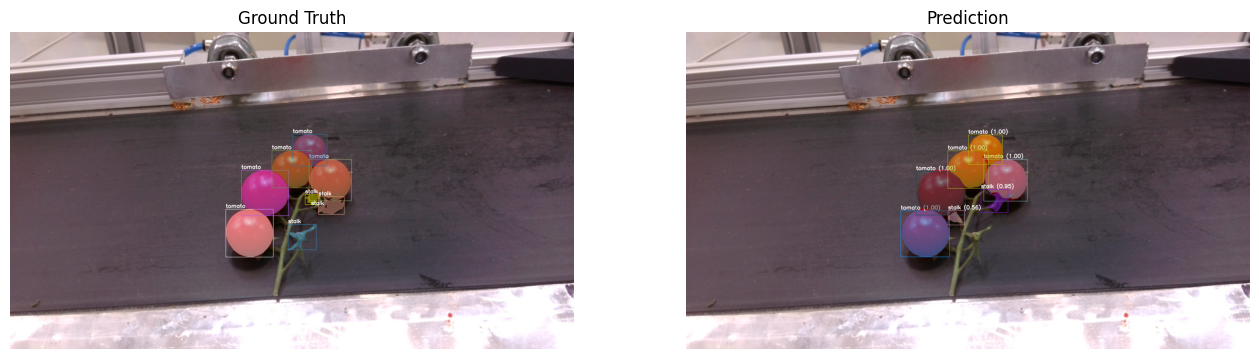

In [4]:
import torch
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import cv2
from pycocotools.coco import COCO


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 3  
model = get_model(num_classes)
model.load_state_dict(torch.load(r"C:\Users\Computing\Desktop\tomato general\maskrcnn_tomato_stalk_rl.pth"))
model.to(device)
model.eval()


def visualize_prediction(image, prediction, threshold=0.5, font_scale=1.2, font_thickness=3):
    image_np = np.array(image)  
    
    masks = prediction['masks'].cpu().numpy()
    boxes = prediction['boxes'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()

    
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(masks))]

    
    for i in range(len(masks)):
        if scores[i] >= threshold:
           
            mask = masks[i, 0] > 0.5  
            color = colors[i]
            
            
            for c in range(3):  
                image_np[:, :, c] = np.where(mask, 
                                             image_np[:, :, c] * 0.5 + color[c] * 0.5, 
                                             image_np[:, :, c])

           
            box = boxes[i]
            cv2.rectangle(image_np, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          color, 2)

            
            class_label = "tomato" if labels[i] == 1 else "stalk"
            cv2.putText(image_np, f'{class_label} ({scores[i]:.2f})', 
                        (int(box[0]), int(box[1]) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image_np


def visualize_ground_truth(image, target, font_scale=1.2, font_thickness=3):
    image_np = np.array(image)  
    
    # Get ground truth masks, labels, and boxes
    masks = target['masks'].numpy()
    boxes = target['boxes'].numpy()
    labels = target['labels'].numpy()

    
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(masks))]

   
    for i in range(len(masks)):
        
        mask = masks[i] > 0.5 
        color = colors[i]
        
        
        for c in range(3):  
            image_np[:, :, c] = np.where(mask, 
                                         image_np[:, :, c] * 0.5 + color[c] * 0.5, 
                                         image_np[:, :, c])

        
        box = boxes[i]
        cv2.rectangle(image_np, 
                      (int(box[0]), int(box[1])), 
                      (int(box[2]), int(box[3])), 
                      color, 2)

       
        class_label = "tomato" if labels[i] == 1 else "stalk"
        cv2.putText(image_np, class_label, 
                    (int(box[0]), int(box[1]) - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image_np


image_path = r"C:\Users\Computing\Desktop\tomato general\test images\cam0__20230627-155112.jpg"
image = Image.open(image_path).convert("RGB")
image_tensor = ToTensor()(image).unsqueeze(0).to(device)


with torch.no_grad():
    prediction = model(image_tensor)[0]


coco = COCO(r"C:\Users\Computing\Desktop\tomato general\test_annotations_rl.json")


img_name = image_path.split('\\')[-1] 
img_ids = coco.getImgIds()
img_id = None

for i in img_ids:
    img_info = coco.loadImgs(i)[0]
    if img_info['file_name'] == img_name:
        img_id = i
        break

if img_id is None:
    raise ValueError(f"Image {img_name} not found in COCO dataset.")

ann_ids = coco.getAnnIds(imgIds=img_id)
annotations = coco.loadAnns(ann_ids)


boxes = []
masks = []
labels = []

for ann in annotations:
    mask = coco.annToMask(ann)
    if mask.sum() == 0:
        continue  
    masks.append(mask)
    x, y, w, h = ann['bbox']
    boxes.append([x, y, x + w, y + h])
    labels.append(ann['category_id'])

boxes = torch.as_tensor(boxes, dtype=torch.float32)
labels = torch.as_tensor(labels, dtype=torch.int64)
masks = torch.stack([torch.as_tensor(mask, dtype=torch.uint8) for mask in masks], dim=0)
target = {'boxes': boxes, 'labels': labels, 'masks': masks}


gt_image = visualize_ground_truth(image, target)
pred_image = visualize_prediction(image, prediction)


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(gt_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Prediction')
plt.imshow(pred_image)
plt.axis('off')

plt.show()


# SAVING PREDICTED AND GROUND TRUTH IMAGES OF TEST DATA

In [ ]:
import os
import torch
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
import cv2
from pycocotools.coco import COCO

# Paths
test_img_dir = r"C:\Users\Computing\Desktop\tomato general\test images"
test_annotations_file = r"C:\Users\Computing\Desktop\tomato general\test_annotations_rl.json"
save_dir = r"C:\Users\Computing\Desktop\tomato general\saved_results"

# Ensure the save directory exists
os.makedirs(save_dir, exist_ok=True)

# Load the trained model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 3  # Background, tomato, stalk
model = get_model(num_classes)
model.load_state_dict(torch.load(r"C:\Users\Computing\Desktop\tomato general\maskrcnn_tomato_stalk_rl.pth"))
model.to(device)
model.eval()


def visualize_prediction(image, prediction, threshold=0.5, font_scale=1.2, font_thickness=3):
    image_np = np.array(image)  
    
   
    masks = prediction['masks'].cpu().numpy()
    boxes = prediction['boxes'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()

    
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(masks))]

    
    for i in range(len(masks)):
        if scores[i] >= threshold:
            
            mask = masks[i, 0] > 0.5 
            color = colors[i]
            
           
            for c in range(3):  
                image_np[:, :, c] = np.where(mask, 
                                             image_np[:, :, c] * 0.5 + color[c] * 0.5, 
                                             image_np[:, :, c])

            
            box = boxes[i]
            cv2.rectangle(image_np, 
                          (int(box[0]), int(box[1])), 
                          (int(box[2]), int(box[3])), 
                          color, 2)

            # Label text
            class_label = "tomato" if labels[i] == 1 else "stalk"
            cv2.putText(image_np, f'{class_label} ({scores[i]:.2f})', 
                        (int(box[0]), int(box[1]) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image_np


def visualize_ground_truth(image, target, font_scale=1.2, font_thickness=3):
    image_np = np.array(image)  
    
    
    masks = target['masks'].numpy()
    boxes = target['boxes'].numpy()
    labels = target['labels'].numpy()

    
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(masks))]

    
    for i in range(len(masks)):
        
        mask = masks[i] > 0.5 
        color = colors[i]
        
        
        for c in range(3):  
            image_np[:, :, c] = np.where(mask, 
                                         image_np[:, :, c] * 0.5 + color[c] * 0.5, 
                                         image_np[:, :, c])

        
        box = boxes[i]
        cv2.rectangle(image_np, 
                      (int(box[0]), int(box[1])), 
                      (int(box[2]), int(box[3])), 
                      color, 2)

       
        class_label = "tomato" if labels[i] == 1 else "stalk"
        cv2.putText(image_np, class_label, 
                    (int(box[0]), int(box[1]) - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)

    return image_np


coco = COCO(test_annotations_file)


img_ids = coco.getImgIds()
for img_id in img_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(test_img_dir, img_info['file_name'])
    
    
    image = Image.open(img_path).convert("RGB")
    image_tensor = ToTensor()(image).unsqueeze(0).to(device)
    
   
    with torch.no_grad():
        prediction = model(image_tensor)[0]
    
    
    ann_ids = coco.getAnnIds(imgIds=img_id)
    annotations = coco.loadAnns(ann_ids)

    
    boxes = []
    masks = []
    labels = []

    for ann in annotations:
        mask = coco.annToMask(ann)
        if mask.sum() == 0:
            continue  # Skip empty masks
        masks.append(mask)
        x, y, w, h = ann['bbox']
        boxes.append([x, y, x + w, y + h])
        labels.append(ann['category_id'])

    if len(masks) == 0:
        continue  

    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    labels = torch.as_tensor(labels, dtype=torch.int64)
    masks = torch.stack([torch.as_tensor(mask, dtype=torch.uint8) for mask in masks], dim=0)
    target = {'boxes': boxes, 'labels': labels, 'masks': masks}
    
    
    gt_image = visualize_ground_truth(image, target)
    pred_image = visualize_prediction(image, prediction)
    
 
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    axes[0].imshow(gt_image)
    axes[0].set_title('Ground Truth')
    axes[0].axis('off')
    
    axes[1].imshow(pred_image)
    axes[1].set_title('Predicted Image')
    axes[1].axis('off')
    
    save_path = os.path.join(save_dir, img_info['file_name'])
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    print(f"Saved: {save_path}")


# EVALUATION OF MASKRCNN

# LOAD MODEL AND DATA

In [3]:
import torch
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Function to load model
def load_model(path, num_classes):
    model = get_model(num_classes)
    model.load_state_dict(torch.load(path))
    model.eval()
    return model

# Load the trained model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = load_model("C:\\Users\\Computing\\Desktop\\tomato general\\maskrcnn_tomato_stalk_rl.pth", num_classes=3)
model.to(device)

# Load datasets
test_dataset = TomatoDataset(annotations_file="C:\\Users\\Computing\\Desktop\\tomato general\\test_annotations_rl.json", 
                             img_dir="C:\\Users\\Computing\\Desktop\\tomato general\\test images", 
                             transform=ToTensor())
val_dataset = TomatoDataset(annotations_file="C:\\Users\\Computing\\Desktop\\tomato general\\val_annotations_rl.json", 
                            img_dir="C:\\Users\\Computing\\Desktop\\tomato general\\val images", 
                            transform=ToTensor())

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


# PRECISION AND RECALL ON BOUNDING BOX AND MASK

In [6]:
import torch
from torchvision.ops import box_iou
import numpy as np

def calculate_metrics(gt_boxes, pred_boxes, gt_labels, pred_labels, iou_threshold=0.5):
    """Calculate precision and recall for bounding boxes for each class."""
    metrics = {}

   
    for label in torch.unique(gt_labels):
        class_name = "Tomato" if label.item() == 1 else "Stalk" if label.item() == 2 else "Unknown"
        gt_mask = gt_labels == label
        pred_mask = pred_labels == label

        if not gt_mask.any() and not pred_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

        if not gt_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

        if not pred_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

       
        iou = box_iou(gt_boxes[gt_mask], pred_boxes[pred_mask])

        
        matches = iou > iou_threshold
        true_positive = matches.any(dim=1).sum().item()
        false_positive = (~matches.any(dim=0)).sum().item()
        false_negative = (~matches.any(dim=1)).sum().item()

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

        metrics[class_name] = {'precision': precision, 'recall': recall}
    
    return metrics

def calculate_mask_metrics(gt_masks, pred_masks, gt_labels, pred_labels, iou_threshold=0.5):
    """Calculate precision and recall for masks for each class."""
    metrics = {}

    for label in torch.unique(gt_labels):
        class_name = "Tomato" if label.item() == 1 else "Stalk" if label.item() == 2 else "Unknown"
        gt_mask = gt_labels == label
        pred_mask = pred_labels == label

        if not gt_mask.any() and not pred_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

        if not gt_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

        if not pred_mask.any():
            metrics[class_name] = {'precision': 0, 'recall': 0}
            continue

        
        iou = torch.tensor([
            torch.sum((gt_masks[g] & pred_masks[p]).float()) / torch.sum((gt_masks[g] | pred_masks[p]).float())
            for g in range(len(gt_masks[gt_mask])) for p in range(len(pred_masks[pred_mask]))
        ]).reshape(len(gt_masks[gt_mask]), len(pred_masks[pred_mask]))

        
        matches = iou > iou_threshold
        true_positive = matches.any(dim=1).sum().item()
        false_positive = (~matches.any(dim=0)).sum().item()
        false_negative = (~matches.any(dim=1)).sum().item()

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

        metrics[class_name] = {'precision': precision, 'recall': recall}

    return metrics

def evaluate_testdata(model, data_loader, device, iou_threshold=0.5):
    model.eval()
    box_metrics = {'Tomato': {'precision': [], 'recall': []}, 'Stalk': {'precision': [], 'recall': []}}
    mask_metrics = {'Tomato': {'precision': [], 'recall': []}, 'Stalk': {'precision': [], 'recall': []}}

    with torch.no_grad():
        for images, targets in data_loader:
            images = [image.to(device) for image in images]
            outputs = model(images)

            for i in range(len(outputs)):
                gt_boxes = targets[i]['boxes'].to(device)
                gt_labels = targets[i]['labels'].to(device)
                gt_masks = targets[i]['masks'].to(device)

                pred_boxes = outputs[i]['boxes']
                pred_labels = outputs[i]['labels']
                pred_masks = outputs[i]['masks'] > 0.5 

                
                box_results = calculate_metrics(gt_boxes, pred_boxes, gt_labels, pred_labels, iou_threshold)
                for cls in box_results:
                    if cls in box_metrics:
                        box_metrics[cls]['precision'].append(box_results[cls]['precision'])
                        box_metrics[cls]['recall'].append(box_results[cls]['recall'])

                # Calculate metrics for masks
                mask_results = calculate_mask_metrics(gt_masks, pred_masks, gt_labels, pred_labels, iou_threshold)
                for cls in mask_results:
                    if cls in mask_metrics:
                        mask_metrics[cls]['precision'].append(mask_results[cls]['precision'])
                        mask_metrics[cls]['recall'].append(mask_results[cls]['recall'])

    
    overall_box_precision = []
    overall_box_recall = []
    overall_mask_precision = []
    overall_mask_recall = []

    for cls in box_metrics:
        box_precision = np.mean(box_metrics[cls]['precision']) if box_metrics[cls]['precision'] else 0
        box_recall = np.mean(box_metrics[cls]['recall']) if box_metrics[cls]['recall'] else 0
        print(f"{cls} - Box Precision: {box_precision:.4f}, Box Recall: {box_recall:.4f}")
        overall_box_precision.extend(box_metrics[cls]['precision'])
        overall_box_recall.extend(box_metrics[cls]['recall'])

    for cls in mask_metrics:
        mask_precision = np.mean(mask_metrics[cls]['precision']) if mask_metrics[cls]['precision'] else 0
        mask_recall = np.mean(mask_metrics[cls]['recall']) if mask_metrics[cls]['recall'] else 0
        print(f"{cls} - Mask Precision: {mask_precision:.4f}, Mask Recall: {mask_recall:.4f}")
        overall_mask_precision.extend(mask_metrics[cls]['precision'])
        overall_mask_recall.extend(mask_metrics[cls]['recall'])

   
    overall_box_precision = np.mean(overall_box_precision) if overall_box_precision else 0
    overall_box_recall = np.mean(overall_box_recall) if overall_box_recall else 0
    overall_mask_precision = np.mean(overall_mask_precision) if overall_mask_precision else 0
    overall_mask_recall = np.mean(overall_mask_recall) if overall_mask_recall else 0

    print(f"Overall Box Precision: {overall_box_precision:.4f}, Overall Box Recall: {overall_box_recall:.4f}")
    print(f"Overall Mask Precision: {overall_mask_precision:.4f}, Overall Mask Recall: {overall_mask_recall:.4f}")


test_annotations_file = r"C:\Users\Computing\Desktop\tomato general\test_annotations_rl.json"
test_img_dir = r"C:\Users\Computing\Desktop\tomato general\test images"

test_dataset = TomatoDataset(annotations_file=test_annotations_file, img_dir=test_img_dir, transform=ToTensor())
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)


evaluate_testdata(model, test_loader, device, iou_threshold=0.5)


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Tomato - Box Precision: 0.8221, Box Recall: 0.8348
Stalk - Box Precision: 0.3936, Box Recall: 0.6309
Tomato - Mask Precision: 0.7274, Mask Recall: 0.7637
Stalk - Mask Precision: 0.4198, Mask Recall: 0.6871
Overall Box Precision: 0.6078, Overall Box Recall: 0.7329
Overall Mask Precision: 0.5736, Overall Mask Recall: 0.7254


# CONFUSION MATRIX ON TEST DATA

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


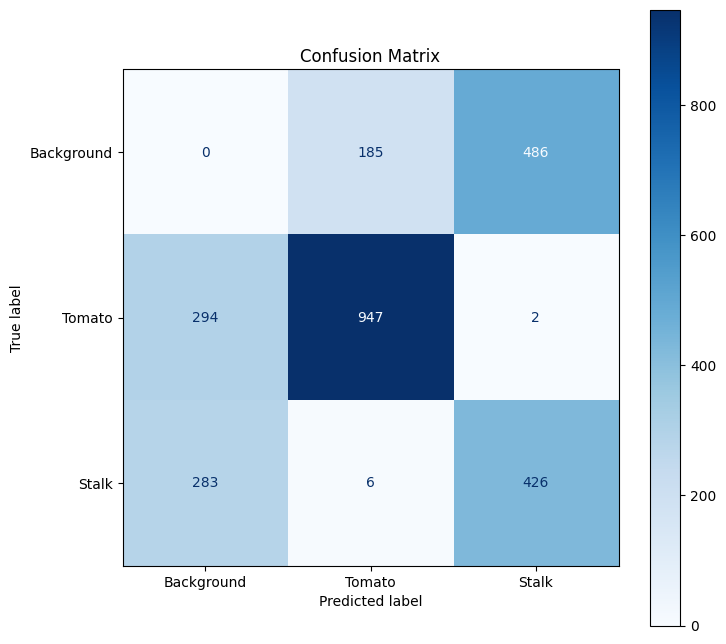

In [27]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from torchvision.ops import box_iou
import numpy as np
%matplotlib inline


# Load the test dataset
test_annotations_file = r"C:\Users\Computing\Desktop\tomato general\test_annotations_rl.json"
test_img_dir = r"C:\Users\Computing\Desktop\tomato general\test images"

# Prepare the test dataset and data loader
test_dataset = TomatoDataset(annotations_file=test_annotations_file, img_dir=test_img_dir, transform=ToTensor())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# Load the trained model
model = get_model(num_classes)
model.load_state_dict(torch.load(r"C:\Users\Computing\Desktop\tomato general\maskrcnn_tomato_stalk_rl.pth"))
model.to(device)
model.eval()

# IoU threshold to consider a prediction as true positive
iou_threshold = 0.5


def calculate_metrics_and_confusion_matrix(model, data_loader, device):
    all_true_labels = []
    all_pred_labels = []
    
    with torch.no_grad():
        for images, targets in data_loader:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
            # Get model predictions
            outputs = model(images)
            
            for i in range(len(targets)):
                true_boxes = targets[i]['boxes'].cpu()
                true_labels = targets[i]['labels'].cpu()
                pred_boxes = outputs[i]['boxes'].cpu()
                pred_labels = outputs[i]['labels'].cpu()
                
                if len(pred_boxes) == 0:
                   
                    all_true_labels.extend(true_labels.numpy())
                    all_pred_labels.extend([0] * len(true_labels))
                else:
                   
                    ious = box_iou(true_boxes, pred_boxes)
                    matched_indices = ious.max(dim=1)[1]
                    matched_ious = ious.max(dim=1)[0]
                    
                    for j, iou in enumerate(matched_ious):
                        if iou >= iou_threshold:
                            all_true_labels.append(true_labels[j].item())
                            all_pred_labels.append(pred_labels[matched_indices[j]].item())
                        else:
                            all_true_labels.append(true_labels[j].item())
                            all_pred_labels.append(0)  

                    
                    unmatched_pred_indices = set(range(len(pred_boxes))) - set(matched_indices.tolist())
                    all_pred_labels.extend([pred_labels[k].item() for k in unmatched_pred_indices])
                    all_true_labels.extend([0] * len(unmatched_pred_indices))
    
    
    conf_matrix = confusion_matrix(all_true_labels, all_pred_labels, labels=[0, 1, 2])
    
    return conf_matrix

# Calculate confusion matrix for the test set
conf_matrix = calculate_metrics_and_confusion_matrix(model, test_loader, device)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Background", "Tomato", "Stalk"])
disp.plot(ax=ax, cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.show()



# MEAN AVERAGE PRECISION (mAP 50)

In [6]:
import torch
from torchvision.ops import box_iou
from collections import defaultdict

def calculate_map_at_50(model, data_loader, num_classes):
    iou_threshold = 0.5  

    model.eval()
    per_class_maps_bbox = defaultdict(list)
    per_class_maps_mask = defaultdict(list)

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            for output, target in zip(outputs, targets):
                pred_boxes = output['boxes'].cpu()
                pred_labels = output['labels'].cpu()
                pred_scores = output['scores'].cpu()
                true_boxes = target['boxes'].cpu()
                true_labels = target['labels'].cpu()

                pred_masks = output['masks'].cpu().squeeze(1)  
                true_masks = target['masks'].cpu()  

                if len(pred_boxes) == 0 or len(true_boxes) == 0:
                    continue  

               
                ious_bbox = box_iou(pred_boxes, true_boxes)

                
                ious_mask = torch.zeros((pred_masks.size(0), true_masks.size(0)))
                for i, pred_mask in enumerate(pred_masks):
                    pred_mask_bin = (pred_mask > 0.5).int()  # Binarize predicted mask
                    for j, true_mask in enumerate(true_masks):
                        true_mask_bin = true_mask.int()  # Binarize true mask if needed
                        intersection = (pred_mask_bin & true_mask_bin).sum().item()
                        union = (pred_mask_bin | true_mask_bin).sum().item()
                        ious_mask[i, j] = intersection / union if union > 0 else 0

                
                for class_id in range(1, num_classes):  # Start from 1 to skip background
                    class_pred_indices = (pred_labels == class_id).nonzero(as_tuple=True)[0]
                    class_true_indices = (true_labels == class_id).nonzero(as_tuple=True)[0]
                    
                    if len(class_pred_indices) == 0 or len(class_true_indices) == 0:
                        continue

                    class_ious_bbox = ious_bbox[class_pred_indices][:, class_true_indices]
                    matches_bbox = (class_ious_bbox > iou_threshold).float().sum(dim=1)
                    tp_bbox = (matches_bbox > 0).float().sum()
                    fp_bbox = (matches_bbox == 0).float().sum()
                    fn_bbox = (len(class_true_indices) - tp_bbox).float()
                    precision_bbox = tp_bbox / (tp_bbox + fp_bbox + 1e-6)
                    recall_bbox = tp_bbox / (tp_bbox + fn_bbox + 1e-6)
                    ap_bbox = precision_bbox * recall_bbox  # Simplified AP calculation
                    per_class_maps_bbox[class_id].append(ap_bbox.item())

                    # Calculate mAP for masks for each class
                    class_ious_mask = ious_mask[class_pred_indices][:, class_true_indices]
                    matches_mask = (class_ious_mask > iou_threshold).float().sum(dim=1)
                    tp_mask = (matches_mask > 0).float().sum()
                    fp_mask = (matches_mask == 0).float().sum()
                    fn_mask = (len(class_true_indices) - tp_mask).float()
                    precision_mask = tp_mask / (tp_mask + fp_mask + 1e-6)
                    recall_mask = tp_mask / (tp_mask + fn_mask + 1e-6)
                    ap_mask = precision_mask * recall_mask  # Simplified AP calculation
                    per_class_maps_mask[class_id].append(ap_mask.item())

    
    maps_bbox_50 = {class_id: per_class_maps_bbox[class_id][0] for class_id in per_class_maps_bbox}
    maps_mask_50 = {class_id: per_class_maps_mask[class_id][0] for class_id in per_class_maps_mask}

   
    overall_map50_bbox = sum(maps_bbox_50.values()) / len(maps_bbox_50)
    overall_map50_mask = sum(maps_mask_50.values()) / len(maps_mask_50)

    return maps_bbox_50, maps_mask_50, overall_map50_bbox, overall_map50_mask


num_classes = 3  


class_names = ["Tomato", "Stalk"]  


maps_bbox_50, maps_mask_50, overall_map50_bbox, overall_map50_mask = calculate_map_at_50(model, test_loader, num_classes)


for class_id, class_name in enumerate(class_names, start=1):  
    print(f"{class_name} mAP@50 (BBox): {maps_bbox_50[class_id]:.4f}")
    print(f"{class_name} mAP@50 (Mask): {maps_mask_50[class_id]:.4f}\n")


print(f"Overall mAP@50 (BBox): {overall_map50_bbox:.4f}")
print(f"Overall mAP@50 (Mask): {overall_map50_mask:.4f}")


Tomato mAP@50 (BBox): 0.9167
Tomato mAP@50 (Mask): 0.9167

Stalk mAP@50 (BBox): 0.5208
Stalk mAP@50 (Mask): 0.3333

Overall mAP@50 (BBox): 0.7187
Overall mAP@50 (Mask): 0.6250


# MODEL TRAINING - YOLO V8

# JSON FILE FOR YOLO

In [1]:
import glob
import json
import os
import cv2

# Label IDs of the dataset representing different categories
category_ids = {
    "Tomato": 1,
    "Stalk": 2,
}

MASK_EXT = 'png'
ORIGINAL_EXT = 'jpg'
image_id = 0
annotation_id = 0

def process_masks(image_folder, tomato_mask_folder, stalk_mask_folder, dest_json):
    global image_id, annotation_id
    image_id = 0
    annotation_id = 0

    
    coco_format = {
        "info": {},
        "licenses": [],
        "images": [],
        "categories": [{"id": value, "name": key, "supercategory": key} for key, value in category_ids.items()],
        "annotations": [],
    }

    annotations = []
    images = []

  
    def add_image_if_not_exists(images, original_file_name, width, height):
        global image_id
        existing_image = next((img for img in images if img['file_name'] == original_file_name), None)
        if not existing_image:
            image = {
                "id": image_id + 1,
                "width": width,
                "height": height,
                "file_name": original_file_name,
            }
            images.append(image)
            image_id += 1
            return image
        return existing_image

    
    for mask_image in glob.glob(os.path.join(tomato_mask_folder, f'*.{MASK_EXT}')):
        original_file_name = os.path.basename(mask_image).split('_mask_')[0] + f'.{ORIGINAL_EXT}'
        original_image_path = os.path.join(image_folder, original_file_name)

        if not os.path.exists(original_image_path):
            continue  # Skip if original image does not exist

        mask_image_open = cv2.imread(mask_image)
        
        
        height, width, _ = mask_image_open.shape

       
        image = add_image_if_not_exists(images, original_file_name, width, height)

  
        gray = cv2.cvtColor(mask_image_open, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

       
        for contour in contours:
            bbox = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)
            segmentation = contour.flatten().tolist()

            annotation = {
                "iscrowd": 0,
                "id": annotation_id,
                "image_id": image['id'],
                "category_id": category_ids["Tomato"],
                "bbox": bbox,
                "area": area,
                "segmentation": [segmentation],
            }

            
            if area > 0:
                annotations.append(annotation)
                annotation_id += 1

    
    for mask_image in glob.glob(os.path.join(stalk_mask_folder, f'*.{MASK_EXT}')):
        original_file_name = os.path.basename(mask_image).split('_mask_')[0] + f'.{ORIGINAL_EXT}'
        original_image_path = os.path.join(image_folder, original_file_name)

        if not os.path.exists(original_image_path):
            continue  
        mask_image_open = cv2.imread(mask_image)
        
       
        height, width, _ = mask_image_open.shape

        
        image = add_image_if_not_exists(images, original_file_name, width, height)

        
        gray = cv2.cvtColor(mask_image_open, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]

        
        for contour in contours:
            bbox = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)
            segmentation = contour.flatten().tolist()

            annotation = {
                "iscrowd": 0,
                "id": annotation_id,
                "image_id": image['id'],
                "category_id": category_ids["Stalk"],
                "bbox": bbox,
                "area": area,
                "segmentation": [segmentation],
            }

            
            if area > 0:
                annotations.append(annotation)
                annotation_id += 1

    coco_format["images"] = images
    coco_format["annotations"] = annotations

    
    with open(dest_json, "w") as outfile:
        json.dump(coco_format, outfile, sort_keys=True, indent=4)

    print("Created %d annotations for images in folder: %s" % (annotation_id, image_folder))

# Process train dataset
train_image_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train images"
train_tomato_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train masks\tomato_train_masks"
train_stalk_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train masks\stalk_train_masks"
train_dest_json = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train_annotations_yol.json"

process_masks(train_image_folder, train_tomato_mask_folder, train_stalk_mask_folder, train_dest_json)

# Process validation dataset
val_image_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val images"
val_tomato_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val masks\tomato_val_masks"
val_stalk_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val masks\stalk_val_masks"
val_dest_json = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val_annotations_yol.json"

process_masks(val_image_folder, val_tomato_mask_folder, val_stalk_mask_folder, val_dest_json)


test_image_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test images"
test_tomato_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test masks\tomato_test_masks"
test_stalk_mask_folder = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test masks\stalk_test_masks"
test_dest_json = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test_annotations_yol.json"

process_masks(test_image_folder, test_tomato_mask_folder, test_stalk_mask_folder, test_dest_json)

Created 7462 annotations for images in folder: C:\Users\Computing\Desktop\Tomato--dataset-n\train images
Created 1021 annotations for images in folder: C:\Users\Computing\Desktop\Tomato--dataset-n\val images
Created 2016 annotations for images in folder: C:\Users\Computing\Desktop\Tomato--dataset-n\test images


# CONVERT JSON TO YOLO V8 POLYGON

In [2]:
import json
import os
import shutil
import yaml


def convert_to_yolo(input_images_path, input_json_path, output_images_path, output_labels_path):
   
    with open(input_json_path, 'r') as f:
        data = json.load(f)

    
    os.makedirs(output_images_path, exist_ok=True)
    os.makedirs(output_labels_path, exist_ok=True)

    
    file_names = []
    for filename in os.listdir(input_images_path):
        if filename.endswith(".jpg"):  # Change to '.jpg' since your images are .jpg
            source = os.path.join(input_images_path, filename)
            destination = os.path.join(output_images_path, filename)
            shutil.copy(source, destination)
            file_names.append(filename)

    
    def get_img_ann(image_id):
        return [ann for ann in data['annotations'] if ann['image_id'] == image_id]

    
    def get_img(filename):
        return next((img for img in data['images'] if img['file_name'] == filename), None)

    
    for filename in file_names:
        img = get_img(filename)
        if img is None:
            continue
        
        img_id = img['id']
        img_w = img['width']
        img_h = img['height']
        img_ann = get_img_ann(img_id)

        
        if img_ann:
            with open(os.path.join(output_labels_path, f"{os.path.splitext(filename)[0]}.txt"), "a") as file_object:
                for ann in img_ann:
                    current_category = ann['category_id'] - 1  
                    polygon = ann['segmentation'][0]
                    normalized_polygon = [format(coord / img_w if i % 2 == 0 else coord / img_h, '.6f') for i, coord in enumerate(polygon)]
                    file_object.write(f"{current_category} " + " ".join(normalized_polygon) + "\n")


def create_yaml(train_images_path, val_images_path, input_json_path, output_yaml_path):
    with open(input_json_path) as f:
        data = json.load(f)
    
    
    names = [category['name'] for category in data['categories']]
    
    
    nc = len(names)

    
    yaml_data = {
        'names': names,
        'nc': nc,
        'train': train_images_path,
        'val': val_images_path,
    }

   
    with open(output_yaml_path, 'w') as file:
        yaml.dump(yaml_data, file, default_flow_style=False)

if __name__ == "__main__":
    # Paths for train, test, and validation datasets
    train_images_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train images"
    val_images_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val images"
    test_images_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test images"

    train_json_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\train_annotations_yol.json"
    val_json_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\val_annotations_yol.json"
    test_json_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\test_annotations_yol.json"

    output_dataset_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\yolo_dataset"

    
    convert_to_yolo(
        input_images_path=train_images_path,
        input_json_path=train_json_path,
        output_images_path=os.path.join(output_dataset_path, "train", "images"),
        output_labels_path=os.path.join(output_dataset_path, "train", "labels")
    )

    
    convert_to_yolo(
        input_images_path=val_images_path,
        input_json_path=val_json_path,
        output_images_path=os.path.join(output_dataset_path, "val", "images"),
        output_labels_path=os.path.join(output_dataset_path, "val", "labels")
    )

    
    convert_to_yolo(
        input_images_path=test_images_path,
        input_json_path=test_json_path,
        output_images_path=os.path.join(output_dataset_path, "test", "images"),
        output_labels_path=os.path.join(output_dataset_path, "test", "labels")
    )

    
    create_yaml(
        train_images_path=os.path.join(output_dataset_path, "train", "images"),
        val_images_path=os.path.join(output_dataset_path, "val", "images"),
        input_json_path=train_json_path,  
        output_yaml_path=os.path.join(output_dataset_path, "data.yaml")
    )


# VISUALIZATION OF ANNOTATED IMAGES

C:\Users\Computing\AppData\Local\Temp\ipykernel_10340\2031926459.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')


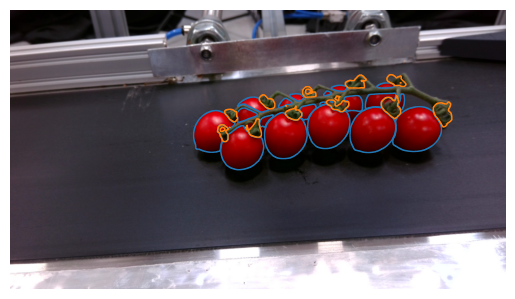

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

def display_image_with_annotations(image_path, annotation_path, colors=None):
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_h, img_w, _ = image.shape
    
    
    fig, ax = plt.subplots(1)
    ax.imshow(image) 

   
    if colors is None:
        colors = plt.cm.get_cmap('tab10')

    
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            category_id = int(parts[0])
           
            color = colors(category_id % 10)
            
            polygon = [float(coord) for coord in parts[1:]]
            polygon = [coord * img_w if i % 2 == 0 else coord * img_h for i, coord in enumerate(polygon)]
            
            polygon = [(polygon[i], polygon[i+1]) for i in range(0, len(polygon), 2)]
           
            patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=False)
            
            ax.add_patch(patch)

    plt.show()  


image_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\yolo_dataset\val\images\cam0__20230831-130402.jpg"
annotation_path = r"C:\Users\Computing\Desktop\Tomato--dataset-n\yolo_dataset\val\labels\cam0__20230831-130402.txt"
display_image_with_annotations(image_path, annotation_path)

# TRAINING YOLO MODEL

In [1]:
from ultralytics import YOLO

# Path to your data.yaml file
data_yaml = r"C:\Users\Computing\Desktop\tomato general\yolo_dataset\data.yaml" 


model = YOLO('yolov8x-seg.pt')  


model.train(data=data_yaml, 
            epochs=10,     
            batch=16)       


model.save('yolov8_tomato_stalk_seg8x.pt')


C:\Users\Computing\AppData\Roaming\Python\Python311\site-packages\torch\cuda\__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Ultralytics YOLOv8.2.81  Python-3.11.6 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i5-11600K 3.90GHz)
engine\trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=C:\Users\Computing\Desktop\tomato general\yolo_dataset\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 24.9MB/s]



Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

train: Scanning C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\labels... 250 images, 0 backgrounds, 0 cor

train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-110936.jpg: 7 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-110945.jpg: 7 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-111012.jpg: 6 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-111529.jpg: 13 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-111539.jpg: 14 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-111549.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\Computing\Desktop\tomato general\yolo_dataset\train\images\cam0__20230525-111641.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\Computi


val: Scanning C:\Users\Computing\Desktop\tomato general\yolo_dataset\val\labels... 33 images, 0 backgrounds, 0 corrupt:

val: New cache created: C:\Users\Computing\Desktop\tomato general\yolo_dataset\val\labels.cache


Plotting labels to runs\segment\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\segment\train7
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7521      1.686      1.398     0.9263        289        640: 100%|██████████| 16/16 [49:33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.298       0.58      0.355      0.245      0.299       0.58      0.358      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.6896      1.335     0.5834     0.8958        234        640: 100%|██████████| 16/16 [46:07
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.755      0.606      0.642      0.456      0.747      0.585       0.62      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7375      1.358     0.5434     0.9068        270        640: 100%|██████████| 16/16 [46:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.767      0.581      0.635      0.452      0.765      0.576       0.63      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.7176      1.289     0.5103      0.895        298        640: 100%|██████████| 16/16 [44:42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021       0.74      0.589      0.615      0.432      0.752      0.578       0.62      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6942      1.228     0.4928     0.8874        224        640: 100%|██████████| 16/16 [43:41
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.806      0.637       0.66      0.482      0.803      0.638      0.668      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6791      1.145     0.4563      0.888        374        640: 100%|██████████| 16/16 [44:43
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021       0.83      0.634      0.653      0.457      0.839       0.64      0.671      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.6502      1.113     0.4429     0.8805        245        640: 100%|██████████| 16/16 [43:35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021       0.86      0.654      0.678      0.491      0.894      0.638       0.69      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6409      1.093     0.4293     0.8787        214        640: 100%|██████████| 16/16 [41:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.845      0.655      0.679      0.497      0.843      0.654      0.693      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6202      1.038     0.3963     0.8696        241        640: 100%|██████████| 16/16 [43:48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.884      0.639       0.68        0.5      0.878      0.641      0.687      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5723     0.9848     0.3813     0.8572        243        640: 100%|██████████| 16/16 [43:58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all         33       1021      0.879      0.652       0.69      0.515      0.887      0.644      0.699      0.455



10 epochs completed in 7.587 hours.
Optimizer stripped from runs\segment\train7\weights\last.pt, 143.9MB
Optimizer stripped from runs\segment\train7\weights\best.pt, 143.9MB

Validating runs\segment\train7\weights\best.pt...
Ultralytics YOLOv8.2.81  Python-3.11.6 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i5-11600K 3.90GHz)
YOLOv8x-seg summary (fused): 295 layers, 71,722,582 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         33       1021      0.878      0.652       0.69      0.515      0.887      0.644      0.699      0.454
                Tomato         33        614      0.936      0.809      0.846      0.732      0.909      0.783      0.831      0.641
                 Stalk         33        407      0.821      0.494      0.535      0.299      0.865      0.505      0.567      0.268
Speed: 1.4ms preprocess, 682.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\train7


# INFERENCE ON TEST IMAGE


0: 384x640 7 Tomatos, 12 Stalks, 618.0ms
Speed: 9.5ms preprocess, 618.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


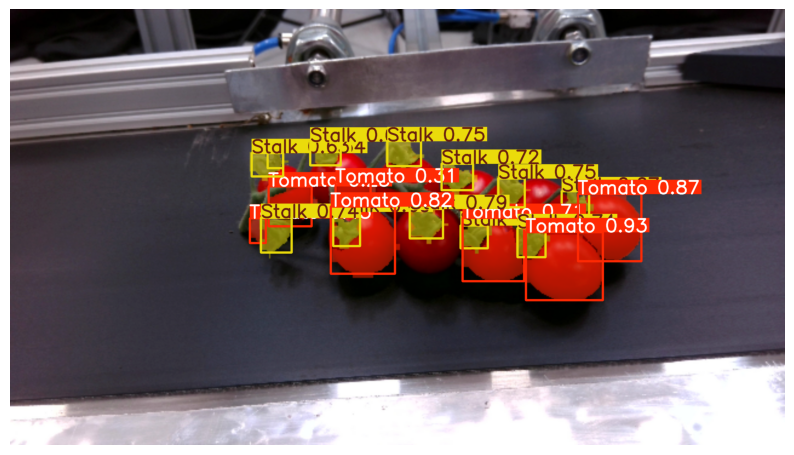

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO(r"C:\Users\Computing\Desktop\tomato general\yolov8_tomato_stalk_seg8x.pt")


image_path = r"C:\Users\Computing\Desktop\tomato general\test images\cam0__20230831-121150.jpg" 


def visualize_inference(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    
    results = model(img)
    
   
    result = results[0]
    
    
    segmented_image = result.plot()  
    
   
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_image)
    plt.axis('off')  
    plt.show()


visualize_inference(image_path)


# YOLO V8 MODEL EVALUATION

In [10]:
from ultralytics import YOLO

# Load the trained model
model = YOLO(r"C:\Users\Computing\Desktop\tomato general\yolov8_tomato_stalk_seg8x.pt")

# Evaluate the model on the test dataset
results = model.val(data=r"C:\Users\Computing\Desktop\tomato general\yolo_dataset\data.yaml",  
                    split='test',  
                    iou=0.5) 


precision = results.box.map50  
recall = results.box.map50  


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Ultralytics YOLOv8.2.81  Python-3.11.6 torch-2.1.2+cu121 CPU (11th Gen Intel Core(TM) i5-11600K 3.90GHz)
YOLOv8x-seg summary (fused): 295 layers, 71,722,582 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning C:\Users\Computing\Desktop\tomato general\yolo_dataset\test\labels.cache... 70 images, 0 backgrounds, 0 c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         70       2016      0.882      0.666        0.7       0.51      0.876      0.657      0.698      0.448
                Tomato         70       1260      0.908      0.796      0.828       0.72      0.892      0.781      0.823      0.632
                 Stalk         70        756      0.856      0.536      0.573      0.299       0.86      0.533      0.572      0.264
Speed: 1.5ms preprocess, 642.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\segment\val2
Precision: 0.7003
Recall: 0.7003


# VISUALIZATION OF THE TWO MODELS RESULT

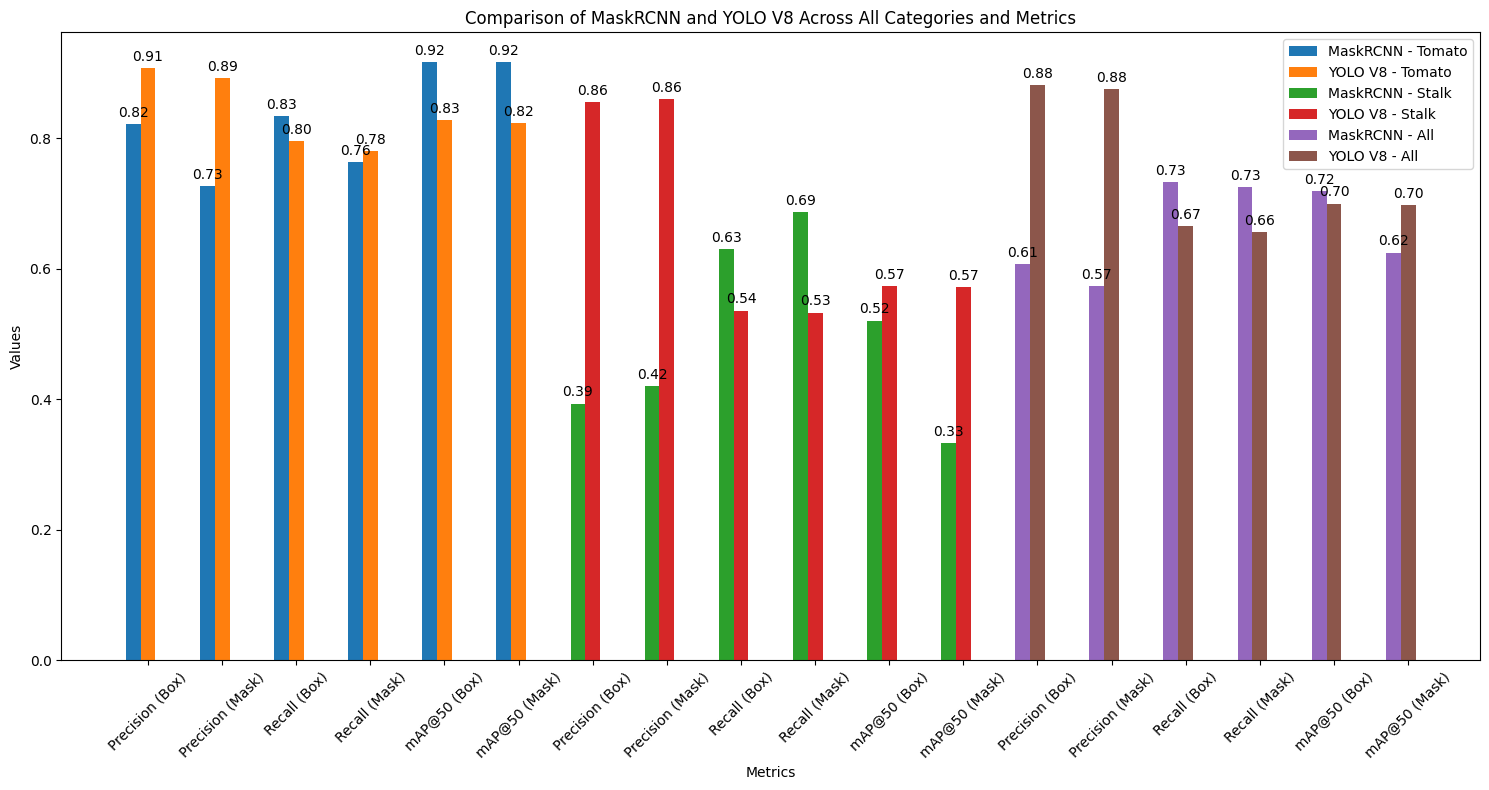

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and metrics
categories = ['Tomato', 'Stalk', 'All']
metrics = ['Precision (Box)', 'Precision (Mask)', 'Recall (Box)', 'Recall (Mask)', 'mAP@50 (Box)', 'mAP@50 (Mask)']

# MaskRCNN values
maskrcnn_values = {
    'Tomato': [0.8221, 0.7274, 0.8348, 0.7637, 0.9167, 0.9167],
    'Stalk': [0.3936, 0.4198, 0.6309, 0.6871, 0.5208, 0.3333],
    'All': [0.6078, 0.5736, 0.7329, 0.7254, 0.7187, 0.6250]
}

# YOLO V8 values
yolov8_values = {
    'Tomato': [0.908, 0.892, 0.796, 0.781, 0.828, 0.823],
    'Stalk': [0.856, 0.86, 0.536, 0.533, 0.573, 0.572],
    'All': [0.882, 0.876, 0.666, 0.657, 0.7, 0.698]
}


x = np.arange(len(metrics))  
width = 0.2  

fig, ax = plt.subplots(figsize=(15, 8))


ax.bar(x - width, maskrcnn_values['Tomato'], width, label='MaskRCNN - Tomato')
ax.bar(x, yolov8_values['Tomato'], width, label='YOLO V8 - Tomato')

ax.bar(x - width + len(metrics), maskrcnn_values['Stalk'], width, label='MaskRCNN - Stalk')
ax.bar(x + len(metrics), yolov8_values['Stalk'], width, label='YOLO V8 - Stalk')

ax.bar(x - width + 2 * len(metrics), maskrcnn_values['All'], width, label='MaskRCNN - All')
ax.bar(x + 2 * len(metrics), yolov8_values['All'], width, label='YOLO V8 - All')


ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of MaskRCNN and YOLO V8 Across All Categories and Metrics')
ax.set_xticks(np.concatenate([x, x + len(metrics), x + 2 * len(metrics)]))
ax.set_xticklabels(metrics * 3)
ax.legend()


def display_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


for container in ax.containers:
    display_values(container)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

